# Условие

Даны $n$ монеток, каждая из которых имеет $p_i$ вероятность выпадения орла. $p_i$ равномерно распределены на $[0,1]$. Каждую монету кидают $k_i$ раз и получают по $m_i$ выпадений орла. Необходимо при известных $k_i$ и $m_i$ отсортировать номера монет $i$ в порядке возрастания вероятностей $p_i$.

# Решение

Первым в голову приходит частотная оценка, то есть поделить количество орлов на количество бросков - $p_i=\frac{m_i}{k_i}$, и отсортировать по возрастанию полученные вероятности. Такой же результат мы бы получили при использовании **метода максимального правдоподобия (MLE)**. Но это решение плохо работает при малом количестве бросков.
<br>
*Пример.* Пусть было совершено всего 3 броска, и 3 раза выпал орёл. По нашей формуле получается, что вероятность выпадения орла у данной монеты 1. Интуитивно мы понимаем, что сильнее верится в полученную $p_i$ при большом количестве бросков, а при малом имеется зачастую высокая вероятность получить любую выборку.


Поэтому в этот раз используем универсальный инструмент для оценки вероятностей - **байесовский вывод**. Этот метод показывает более хорошие результаты при малых объемах данных. В то же время, он так же хорошо работает, как и классические методы, и при больших объемах данных. Особенность метода в том, что мы рассматриваем *вероятность вероятности события*, то есть в задаче с монеткой не рассматриваем вероятность орла, как что-то постоянное, а как тоже случаную величину. Звучит непонятно, но это пока что.
<br>
*!!! Далее в объяснении метода может показаться, что все сложно и непонятно. Держим в голове, что это не сложно, и особенно держим в голове, что не обязательно понимать каждый шаг объяснения. Полное понимание должно прийти при полном прочтении объяснения. Если что-то не очень понятно после пары прочтений, просто принимаем на веру, и двигаемся дальше - потом всё станет ясно !!!*
<br>
В основе метода лежит самая известная теорема теории вероятностей - **теорема Байеса**:
$$
P(A|B)=\frac{P(B|A)P(A)}{P(B)}=\frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|\neg A)P(\neg A)}
$$
где вероятности можно трактовать по-разному.
1. Обычно впервые студентам эту формулу объясняют как ту, через которую можно вывести **условную вероятность**. Здесь $P(A)$ и $P(B)$ - вероятности события $A$ и $B$, а остальные - условные вероятности. Например, $P(A|B)$ - вероятность события $A$ при условии, что событие $B$ произошло. Третья же формула просто написана с использованием **формулы полной вероятности**.
<br>
Интуитивно теорема понятна, особенно, если перенести знаменатель влево и получить $P(A|B)P(B)=P(B|A)P(A)=P(AB)$. Формула полной вероятности тоже интуитивно понятна, в ней показано, что полная вероятность события $B$ - это сумма вероятностей, что это событие произошло одновременно попарно со всеми прочими событиями (первое слагаемое - когда $A$ случилось, второе - когда $A$ не случилось).
2. В байесовском выводе трактовка другая. Сразу перепишем формулу Байеса с обозначениями из байесовского вывода.
$$
P(\Theta|D)=\frac{P(D|\Theta)P(\Theta)}{P(D)}
$$
Сейчас будет *краткое* описание обозначений в формуле. Сразу после этого будет более подробное по каждому.
<br>
Итак, здесь $\Theta$ - неизвестный параметр, искомая вероятность $p$; $D$ - наблюдаемая выборка; $P(\Theta)$ - **априорная вероятность**, то есть наше начальное предположение о распределении искомой вероятности (та самая вероятность вероятности); $P(D|\Theta)$ - **функция правдоподобия** (та самая из метода максимального правдоподобия), то есть вероятность получить наблюдаемую выборку при заданной вероятности $\Theta$; $P(D)$ - нормализующая константа, она гарантирует, что $P(\Theta|D)$ является корректным распределением вероятностей (позже про нёё будет сказано больше); $P(\Theta|D)$ - **апостериорная вероятность**, вероятность, найденная после учёта полученной выборки, данных.

## Получение значений из формулы Байеса

Теперь по кусочкам каждый элемент формулы.
1. $P(D|\Theta)$
   <br>
   Начнем с простого. Того, что мы уже должны знать, и что бы делали в классических методах - функция правдоподобия (если не знаем - сначала читаем метод максимального правдоподобия). В задаче известно количество орлов $m$ и количество бросков монеты $k$, тогда количество решек $k-m$.
   <br>
   Перед нами самое простое распределение вероятностей - **распределение Бернулли**, то есть такое, где есть всего два события - успех и неуспех. Его функция вероятности $P(x=\text{успех})=p$, $P(x=\text{неуспех})=1-p$. Успех обозначают как $x=1$, а неуспех как $x=0$. Тогда функция вероятности переписывается в единую $P(x)=p^x(1-p)^{1-x}$. Понять ее просто, достаточно в уме подставить $x=1$ и $x=0$ в формулу, и все станет понятно.
   <br>
   Функция правдоподобия, являясь вероятностью независимой выборки, равна произведению независимых событий выборки
   $$
   P(D|\Theta)=\prod_{i=1}^nP(d_i|\Theta)={k \choose m}\Theta^m(1-\Theta)^{k-m}
   $$
   Здесь ${k \choose m}=\frac{k!}{(k-m)!m!}$ - биномиальный коэффициент или число сочетаний из $k$ по $m$, то есть количество способов получить $m$ орлов при $k$ бросках. В сочетаниях порядок следования фиксированных элементов не важен, а важен сам набор элементов. То есть набор с двумя орлами при трех бросках ООР идентичен набору ОРО. А вообще, функция правдободобия оказалась равна **биномиальному распределению**.
   <br>
   Используй мы сейчас метод максимального правдоподобия, искали бы экстремум функции правдоподобия через производную, приравнянную к нулю.
3. $P(\Theta)$
   <br>
   Самое интересное в байесовском выводе. **Априорная вероятность (prior probability)** - наше предположение о распределении вероятности выпадения орла - вероятность вероятности! Конкретно в данной задаче нам сказано, что *вероятность выпадения орла равномерно распределена на $[0, 1]$*. Это значит, что вероятность того, что вероятность выпадения орла, скажем, $P(\Theta=0.2)$, равна вероятности, что вероятности $P(\Theta=0.65)$: $P(\Theta_a)=P(\Theta_b)$ для любых $\Theta_a$ и $\Theta_b$. Какая же это вероятность конкретно, в числах? А такая:
   $$
P(\Theta) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ \Theta\in[0,1] \\
        0 & \mbox{else} \\
    \end{array}
\right.
$$
Сразу вопрос: почему вероятность любой вероятности $\Theta$ равна единице, а не какому-то другому числу? И вообще, ведь сумма всех $P(\Theta_i)$ должна быть равна 1. А если все вероятности равны 1, то их сумма точно больше 1. Потому что мы выразили *плотность распределения вероятности $P(\Theta)$*, а не *функцию вероятности*. Может казаться, что это одинаковые вещи, просто плотность распределения для непрерывного распределения, а функция вероятности для дискретного. В общем-то зачастую эти понятия синонимизируют, однако свои различия есть. Плотность распределения не дает точного значения вероятности в заданной точке в отличии от функции вероятности, а дает вероятность попадания в некоторый диапазон значений. В связи с этим говорить о сумме значений плотности распределения некорректно, в отличии от интеграла от плотности распределения. Взглянем на график $P(\Theta)$ внизу. Можно убедиться, что площадь под графиком равна 1.
<br>
Вообще, если бы нам ничего не было известно из условия, выбор $P(\Theta)=1$ был бы наиболее нейтральным, с которым мы не строим априорных предположений о том, чему может быть равна вероятность $\Theta$ выпадения орла. Вот если бы мы считали, что монетка скорее честная, то можно было бы задать какое-нибудь априорное распределение с пиком в точке 0.5.

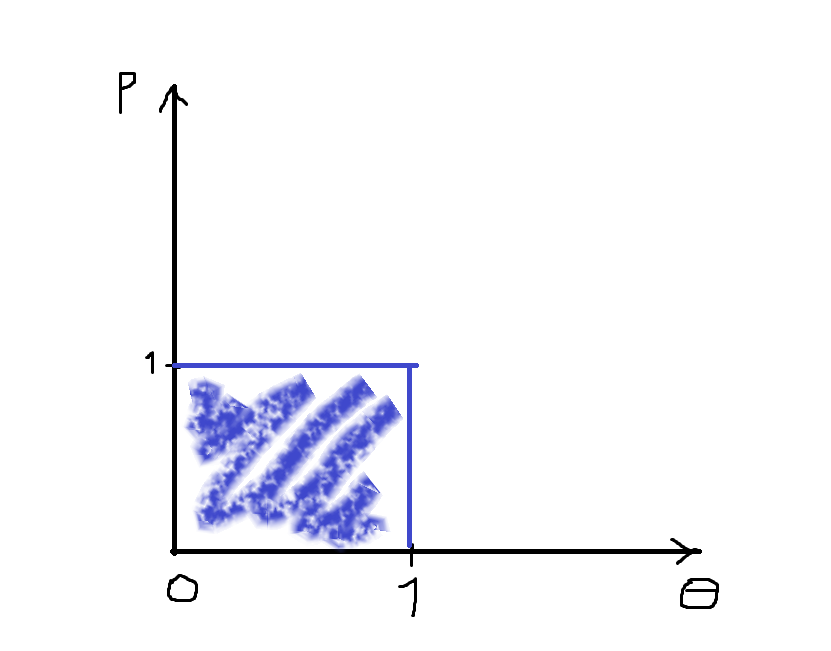

4. $P(D)$
   <br>
   Если представить, что $P(D)$ не нужно, и построить график $P(\Theta|D)=P(D|\Theta)P(\Theta)$, то окажется, что полученное распределение (в нашем случае это просто функция правдоподобия, так как умножается на 1), не является на самом деле распределением, так его интеграл не равен 1. Для этого и нужен нормализирующий множитель. Как его найти? Давайте он просто будет равен значению этого интеграла $\int_0^1P(D|\Theta)P(\Theta)\,d\Theta$. Тогда получается, что числитель мы делим на значение интеграла этого числителя, и в итоге интеграл $P(\Theta|D)$ будет равен 1.
   <br>
   Посчитаем интеграл для нашей задачи.
   $$
   \begin{multline}
   \\
   P(D)=\int_0^1P(D|\Theta)P(\Theta)\,d\Theta=\int_0^1{k \choose m}\Theta^m(1-\Theta)^{k-m}\cdot1\,d\Theta=\text{[по определению бета-распределения]}=\\
   ={k \choose m}B(m+1,k-m+1)=\text{[по связи бета-функции и гамма-функции - }B(\alpha, \beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\text{ и по определению }\Gamma(n)=(n-1)! \text{]}=\\
   ={k \choose m}\frac{\Gamma(m+1)\Gamma(k-m+1)}{\Gamma((m+1)+(k-m+1))}={k \choose m}\frac{m!(k-m)!}{(k+1)!}={k \choose m}\frac{1}{(k+1){k \choose m}}=\frac{1}{k+1}\\
   .
   \end{multline}
   $$

## Полученное распределение

Теперь наконец-то все можно подставить в формулу Байеса.
$$
\begin{multline}
\\
P(\Theta|D)=\frac{P(D|\Theta)P(\Theta)}{P(D)}=\frac{{k \choose m}\Theta^m(1-\Theta)^{k-m}\cdot1}{\frac{1}{k+1}}=(k+1){k \choose m}\Theta^m(1-\Theta)^{k-m}=\\
=\text{[так как по определению }Beta(x;\alpha,\beta)=\frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}\text{]}=Beta(\Theta;m+1,k-m+1)\\
.
\end{multline}
$$
Перед нами функция плотности бета-распределения, которое уже изучено теоретически, и с помощью которого мы будем легко оценивать вероятности орлов в задаче.
<br>
*Вообще говоря, можно было бы и не считать $P(D)$. Нам не нужно нормализовывать распределение $P(D|\Theta)P(\Theta)$, потому что от нормализации просто график вытянется вверх или вниз, так как мы все его значения просто делим на $P(D)$. И нам все равно на масштаб графика, мы просто по нему выбираем $\Theta$, используя моду, медиану, мат. ожидание*
<br>
Как мы и написали выше, можно использовать разные показатели центра распределения, чтобы определить наиболее подходящую оценку $\Theta$. Построим для этого график бета-распределения с 10 бросками монеты, где выпало 7 орлов и 3 решки. На графике отметим моду, медиану и мат. ожидание.

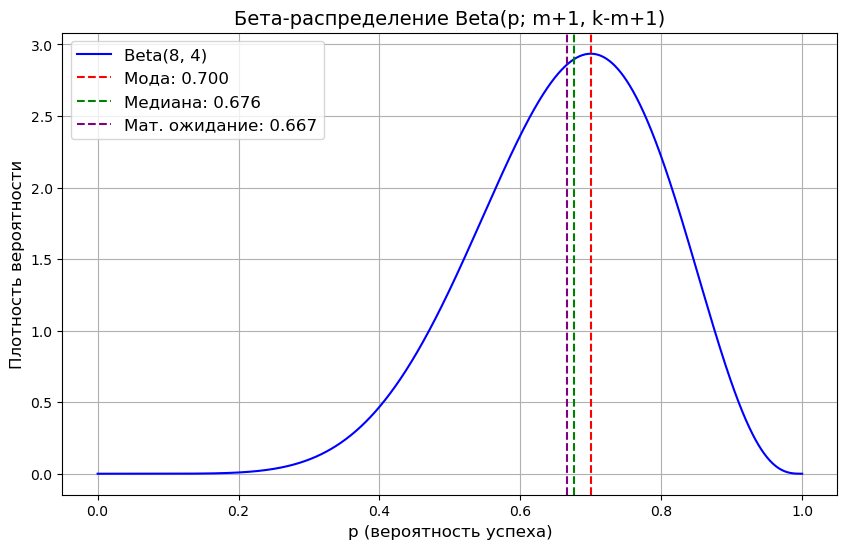

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Параметры задачи
k = 10  # Общее количество бросков
m = 7   # Количество выпавших орлов

# Параметры бета-распределения
alpha = m + 1
beta_param = k - m + 1

# Создаем объект бета-распределения
dist = beta(alpha, beta_param)

# Генерация значений p (вероятность успеха) для графика
p_values = np.linspace(0, 1, 1000)

# Вычисление плотности вероятности для каждого значения p
pdf_values = dist.pdf(p_values)

# Вычисление моды, медианы и математического ожидания
mode = (alpha - 1) / (alpha + beta_param - 2) #вывод формулы будет в следующем разделе. Мода вычисляется через приправнивание производной распределенеия к 0 и выражение параметра, то есть ровно то же, что мы делаем в методе максимального правдоподобия
median = dist.median()
mean = dist.mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_values, pdf_values, label=f'Beta({alpha}, {beta_param})', color='blue')

# Отмечаем моду, медиану и математическое ожидание на графике
if mode is not None:
    plt.axvline(mode, color='red', linestyle='--', label=f'Мода: {mode:.3f}')
plt.axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.3f}')
plt.axvline(mean, color='purple', linestyle='--', label=f'Мат. ожидание: {mean:.3f}')

# Добавляем легенду и подписи осей
plt.title('Бета-распределение Beta(p; m+1, k-m+1)', fontsize=14)
plt.xlabel('p (вероятность успеха)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Отображаем график
plt.show()

## Поиск лучшей оценки вероятности выпадения орла

Как видно из графика, все три потенциальные оценки $\Theta$ отличаются друг от друга. И нам надо как-то нужно определить какая лучше определяет вероятность. Пускай существует $p_i$ - истинная вероятность выпадения орла, а наша оценка $\widehat p_i$. Давайте используем нашу любимую квадратичную функцию потерь $L(p_i,\widehat p_i)=(p_i-\widehat p_i)^2$. Будем минимизировать среднюю потерю
$$
E_{p_i|m_i,k_i}[(p_i-\widehat p_i)^2]=E_{p_i|m_i,k_i}[p_i^2-2p_i\widehat p_i+\widehat p_i^2]=E[p_i^2|m_i,k_i]-2\widehat p_iE[p_i|m_i,k_i]+\widehat p_i^2
$$
Минимум находится в точке экстремума, поэтому будем считать производную
$$
\frac{\partial E_{p_i|m_i,k_i}[(p_i-\widehat p_i)^2]}{\partial \widehat p_i}=2\widehat p_i - 2E[p_i|m_i,k_i]=0
$$
$$
\widehat p_i = E[p_i|m_i,k_i]
$$
Итак, доказали, что мат ожидание явялется лучшей оценкой вероятности. Теперь выведем мат ожидание бета-распределения.
$$
\begin{multline}
\\
E[p_i|m_i,k_i]=\int_0^1 \Theta Beta(\Theta;m+1,k-m+1)\,d\Theta=\int_0^1 \Theta \frac{1}{B(m+1,k-m+1)}\Theta^m(1-\Theta)^{k-m}\,d\Theta=\\
=\frac{1}{B(m+1,k-m+1)}\int_0^1\Theta^{m+1}(1-\Theta)^{k-m}\,d\Theta=\text{[вспоминаем определение бета-функции]}=\frac{B(m+2,k-m+1)}{B(m+1,k-m+1)}=\\
=\text{[а теперь вспоминаем связь бета-функции с гамма-функцией]}=\frac{\frac{\Gamma(m+2)\Gamma(k-m+1)}{\Gamma(m+2+k-m+1)}}{\frac{\Gamma(m+1)\Gamma(k-m+1)}{\Gamma(m+1+k-m+1)}}=\\
=\text{[не забываем, что }\Gamma(n)=(n-1)!\text{]}=\frac{\frac{(m+1)!(k-m)!}{(k+2)!}}{\frac{m!(k-m)!}{(k+1)!}}=\frac{m+1}{k+2}\\
.
\end{multline}
$$
То есть теперь для решения задачи просто выразим для всех $k_i,m_i$ вероятность выпадения орла $p_i=E[p_i|m_i,k_i]=\frac{m+1}{k+2}$ и отсортируем в порядке возрастания.

## Сравнение с методом максимального правдоподбия, поведение бета-распределения при увеличении количества данных

Давайте посчитаем как бы мы предсказывали вероятность выпадения орла, используй мы метод максимального правдоподобия. В этом методе мы используем только функцию правдоподобия $P(D|\Theta)={k \choose m}\Theta^m(1-\Theta)^{k-m}$. Найдем такой $\Theta$, чтобы максимизировать функцию правдоподобия. Для этого как всегда будем максимизировать логарифм от функции правдоподобия, расчеты с которым гораздо проще. Причем, не будем учитывать наличие множителя ${k \choose m}$, так как он не влияет на положение экстремумов.
$$
\begin{multline}
\\
\text{обозначим }l=\ln \frac{P(D|\Theta)}{{k \choose m}}=\ln(\Theta^m(1-\Theta)^{k-m})=m\ln\Theta+(k-m)\ln(1-\Theta)\\
\frac{\partial l}{\partial \Theta}=\frac{m}{\Theta}+\frac{k-m}{1-\Theta}=0\\
m(1-\Theta)=(k-m)\Theta\\
m-m\Theta=k\Theta-m\Theta\\
\Theta=\frac{m}{k}\\
.
\end{multline}
$$
По определению **мода** - это наиболее вероятное значение случайной величины, то есть экстремум, который мы и ищем методом максимального правдоподобия.
<br>
Итак, по методу максимального правдоподобия $p=\frac{m}{k}$, а по байесовскому выводу $p=\frac{m+1}{k+2}$. Результаты очень похожие. Но почему байесовский метод считается лучше?
<br>
В самом начале у нас был пример, когда 3 раза кинули монетку и 3 раза выпал орел. Метод максимального правдоподобия показал бы, что вероятность орла 1. Но мы-то интуитивно понимаем, что такого быть почти не может, и что рано такие радикальные выводы делать для всего трех бросков. Байесовский метод показал бы вероятность выпадения орла 0.8. Звучит куда более логично, ведь мы с таким малым количеством бросков еще не до конца уверены, что монетка абсолютно нечестная, хоть и имеем предположение, что она склонна чаще выдавать орла.
<br>
*На самом деле еще интуитивно можно объяснить использование мат ожидания вместо моды, как то, что для мат ожидания используется инфрмация о всем распределении, так как считается среднее по всем данным*
<br>
То есть <u>метод максимального правдоподобия плохо работает на малых объемах данных, а байесовский вывод лучше</u>. Более того, если бы мы имели какое-то априорное предположение (знания) $P(\Theta)$ о распределении $p$, например, думали (знали) бы, что монетка скорее честная, то это априорное распределение при умножении на функцию правдоподобия сдвигала бы предсказание ближе к 0.5. Мы бы имели результат меньше 0.8. То есть малое количество данных, всего 3 броска, не могли бы заставить нас думать, что монетка нечестная. Мы бы все еще склонялись к мысли, что она скорее честная.
<br>
В то же время, <u>байесовский вывод при большом количестве данных потихоньку начинает игнорировать априорное распределение</u>. Он все больше начинает верить функции правдоподобия. Это можно видеть и по формуле в этой задаче $p=\frac{m+1}{k+2}$, которая при стремлении $m$ и $k$ будет сравниваться с предсказанием метода максимального правдподобия $p=\frac{m}{k}$. Это также можно продемонстрировать на нашей задаче с монеткой.
<br>
Построим три графика бета-распределения: для 10 бросков и 7 орлов, для 100 бросков и 70 орлов и для 1000 бросков и 700 орлов.

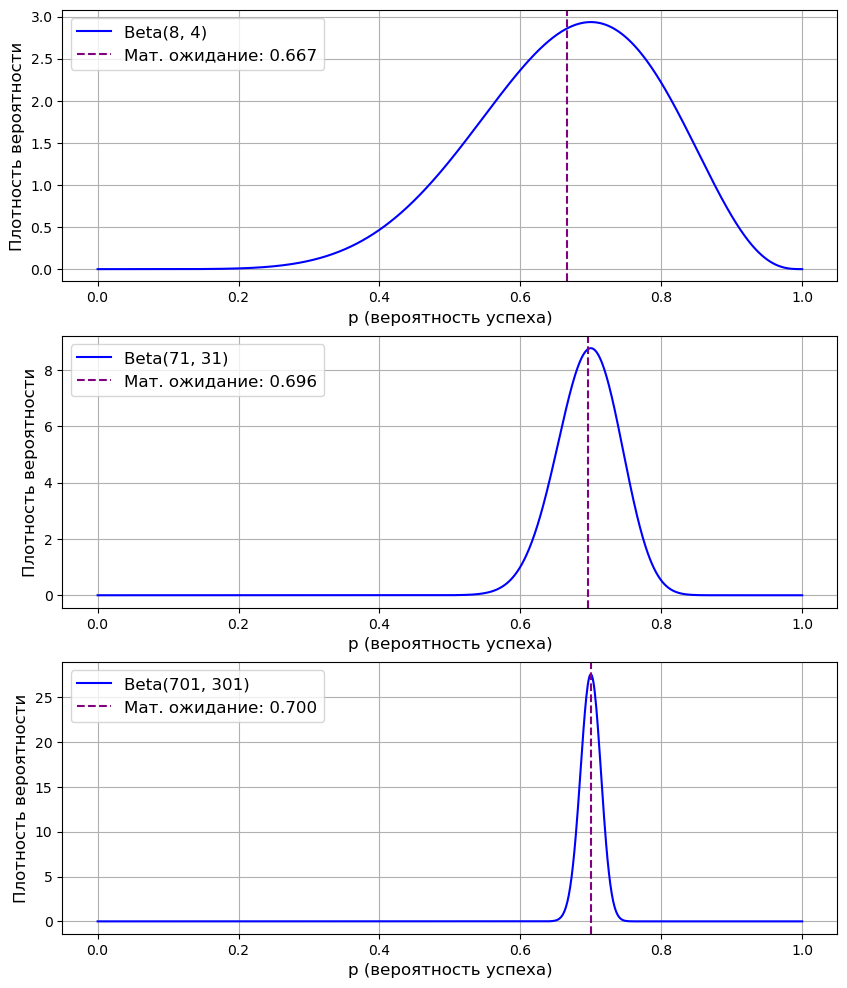

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Параметры задачи
k = [10, 100, 1000]  # Общее количество бросков
m = [7, 70, 700]   # Количество выпавших орлов

plt.figure(figsize=(10, 12))
for i in range(3):
    # Параметры бета-распределения
    alpha =  m[i] + 1
    beta_param = k[i] - m[i] + 1

    # Создаем объект бета-распределения
    dist = beta(alpha, beta_param)

    # Генерация значений p (вероятность успеха) для графика
    p_values = np.linspace(0, 1, 1000)

    # Вычисление плотности вероятности для каждого значения p
    pdf_values = dist.pdf(p_values)

    # Вычисление математического ожидания
    mean = dist.mean()

    # Построение графика
    plt.subplot(3, 1, i + 1)
    plt.plot(p_values, pdf_values, label=f'Beta({alpha}, {beta_param})', color='blue')

    # Отмечаем математическое ожидание на графике
    plt.axvline(mean, color='purple', linestyle='--', label=f'Мат. ожидание: {mean:.3f}')

    # Добавляем легенду и подписи осей
    plt.xlabel('p (вероятность успеха)', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

# Отображаем график
plt.show()

На графиках хорошо видно, что апостериорная вероятность - мат ожидание бета-распределения - с увеличением количества данных все более приближается к классическим оценкам вероятности, все ближе к результату метода максимального правдоподобия. И столб распределения тоже становится поуже, сильнее отбрасывая возможность $p$ быть неравной пику графика.

## Выводы о байесовском выводе

Байесовский вывод - это универсальный инструмент, работающий хорошо и на больших данных, и на малых. Однако и у него есть свои недостатки. Выделим плюсы и минусы этого метода, подведем итог когда лучше использовать его, а когда классические методы.

--------------------------
**Преимущества**
1. Использование априорной информации.
   <br>
   Если у нас есть предположения или знания, их можно заложить в оценке вероятности.
2. Апостериорная неопределенность.
   <br>
   С байесовским выводом мы получаем полное апостериорное распределение, которое позволяет оценивать доверительные интервалы, дает больше информации, чем классические методы, дающие только оценку вероятности.
3. Обновление знаний.
   <br>
   При поступлении новых данных, апостериорное распределение можно последовательно обновлять.
4. *Гибкость
   <br>
   Метод работает со всеми видами моделей, в том числе с *иерархическими (я с таким не сталкивался, надо читать отдельно)*, с которыми классические методы могут не работать.

--------------------------
**Недостатки**
1. Вычислительная сложность.
   <br>
   В этой задаче было аналитическое решение, но вообще это редкость (этого я не знаю, так говорит chatGPT. Дальнейшая информация тоже мной не изучена, а только переписана из чата). И зачастую для вычисления апостериорной вероятности приходится прибегать к методу Монте-Карло или вариационному выводу.
2. Выбор априорного распределения
   <br>
   Неверный выбор априорного распределения может повлиять на ответ, особенно при малом количестве данных. И в принципе выбор априорного распределения не всегда очевиден.
3. Сложность интерпретации в отличии от классческих методов (так говорит чат, я с таким еще не сталкивался).

--------------------------
**Что и когда лучше использовать**
|**Ситуация**|**Байесовский вывод**|**Классический вывод**|
|------|------|------|
|Есть априорная информация|Лучше|Хуже|
|Нужна оценка неопределенности|Лучше|Хуже|
|Сложные модели|Лучше|Хуже|
|Большие данные|Можно использовать, но классика проще|Лучше|
|Простые задачи (не нужно все распределение)|Может быть избыточным|Лучше|

# Код

In [7]:
f = open('240coins.in')
n = int(f.readline())
p = []
for i in range(n):
    k, m = [int(x) for x in f.readline().split()]
    p.append((m + 1) / (k + 2))
order = sorted(range(n), key=lambda i: p[i])
f2 = open('240output.txt', 'w')
for i in range(n):
    f2.write(str(order[i]))
    f2.write('\n')
f.close()
f2.close()